In [2]:
!pip install yfinance

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np

In [4]:
symbols = [
    "AAPL", "MSFT", "GOOGL", "AMZN", "NVDA",
    "TSLA", "META", "IBM", "TSM", "UNH",
    "JNJ", "V", "XOM", "WMT", "PG"
]

In [5]:
start = "2018-01-01"
end = "2025-01-01"

In [6]:
for symbol in symbols:
    print(f"⬇ Fetching {symbol}...")
    data = yf.download(symbol, start=start, end=end, interval="1d")
    if not data.empty:
        data.to_csv(f"/content/csv/{symbol}_historical.csv")
        print(f"✅ Saved to data /content/csv{symbol}_historical.csv")
    else:
        print(f"❌ No data for {symbol}")

⬇ Fetching AAPL...
YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


✅ Saved to data /content/csvAAPL_historical.csv
⬇ Fetching MSFT...
✅ Saved to data /content/csvMSFT_historical.csv
⬇ Fetching GOOGL...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


✅ Saved to data /content/csvGOOGL_historical.csv
⬇ Fetching AMZN...
✅ Saved to data /content/csvAMZN_historical.csv
⬇ Fetching NVDA...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

✅ Saved to data /content/csvNVDA_historical.csv
⬇ Fetching TSLA...
✅ Saved to data /content/csvTSLA_historical.csv
⬇ Fetching META...


✅ Saved to data /content/csvMETA_historical.csv
⬇ Fetching IBM...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


✅ Saved to data /content/csvIBM_historical.csv
⬇ Fetching TSM...
✅ Saved to data /content/csvTSM_historical.csv
⬇ Fetching UNH...


[*********************100%***********************]  1 of 1 completed


✅ Saved to data /content/csvUNH_historical.csv
⬇ Fetching JNJ...


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

✅ Saved to data /content/csvJNJ_historical.csv
⬇ Fetching V...


✅ Saved to data /content/csvV_historical.csv
⬇ Fetching XOM...


[*********************100%***********************]  1 of 1 completed


✅ Saved to data /content/csvXOM_historical.csv
⬇ Fetching WMT...


[*********************100%***********************]  1 of 1 completed


✅ Saved to data /content/csvWMT_historical.csv
⬇ Fetching PG...


[*********************100%***********************]  1 of 1 completed

✅ Saved to data /content/csvPG_historical.csv


In [7]:
file = "/content/AAPL_historical.csv"

In [8]:
df = pd.read_csv(file)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1763 entries, 0 to 1762
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Price   1763 non-null   object
 1   Close   1762 non-null   object
 2   High    1762 non-null   object
 3   Low     1762 non-null   object
 4   Open    1762 non-null   object
 5   Volume  1762 non-null   object
dtypes: object(6)
memory usage: 82.8+ KB


In [10]:
df.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
1,Date,NaN,NaN,NaN,NaN,NaN
2,2018-01-02,40.479835510253906,40.489237224924096,39.774857509538,39.986353061174896,102223600
3,2018-01-03,40.47279357910156,41.01797838932272,40.409348128889434,40.54329210948591,118071600
4,2018-01-04,40.66078186035156,40.764179210026526,40.43753953848259,40.545634159903784,89738400


In [11]:
def clean_csv(symbol):
    try:
        path = f"/content/csv/{symbol}_historical.csv"
        print(f"🧹 Cleaning {symbol}...")

        # Load whole CSV first
        raw = pd.read_csv(path, header=None)

        # Find the first row that looks like a valid date
        start_idx = raw[0].astype(str).str.match(r'\d{4}-\d{2}-\d{2}').idxmax()

        # Read again with correct header
        df = pd.read_csv(path, skiprows=start_idx-1)
        df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

        # Convert types
        df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d")
        df.set_index('Date', inplace=True)
        df = df.apply(pd.to_numeric, errors='coerce')
        df.dropna(inplace=True)

        df.to_csv(f"/content/cleaned/{symbol}_cleaned.csv")
        print(f"✅ Saved cleaned {symbol} data")

    except Exception as e:
        print(f"❌ Error cleaning {symbol}: {e}")

for symbol in symbols:
    clean_csv(symbol)

🧹 Cleaning AAPL...
✅ Saved cleaned AAPL data
🧹 Cleaning MSFT...
✅ Saved cleaned MSFT data
🧹 Cleaning GOOGL...
✅ Saved cleaned GOOGL data
🧹 Cleaning AMZN...
✅ Saved cleaned AMZN data
🧹 Cleaning NVDA...
✅ Saved cleaned NVDA data
🧹 Cleaning TSLA...
✅ Saved cleaned TSLA data
🧹 Cleaning META...
✅ Saved cleaned META data
🧹 Cleaning IBM...
✅ Saved cleaned IBM data
🧹 Cleaning TSM...
✅ Saved cleaned TSM data
🧹 Cleaning UNH...
✅ Saved cleaned UNH data
🧹 Cleaning JNJ...
✅ Saved cleaned JNJ data
🧹 Cleaning V...
✅ Saved cleaned V data
🧹 Cleaning XOM...
✅ Saved cleaned XOM data
🧹 Cleaning WMT...
✅ Saved cleaned WMT data
🧹 Cleaning PG...
✅ Saved cleaned PG data


In [12]:
!pip install scikit-learn tensorflow

In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [14]:
data_path = '/content/cleaned/'
symbols = [
    "AAPL", "MSFT", "GOOGL", "AMZN", "NVDA",
    "TSLA", "META", "IBM", "TSM", "UNH",
    "JNJ", "V", "XOM", "WMT", "PG"
]


📊 Processing AAPL
Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0252
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.0246e-04
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.4770e-04
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.2964e-04
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.7306e-04
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.6446e-04
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.4451e-04
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.4168e-04
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.0639e-04
Epoch 10/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.1951e-04
Epoch 11/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.6035e-04
Epoch 12/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.9306e-04
Epoch 13/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.4877e-04
Epoch 14/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.2990e-04
Epoch 15/50
4

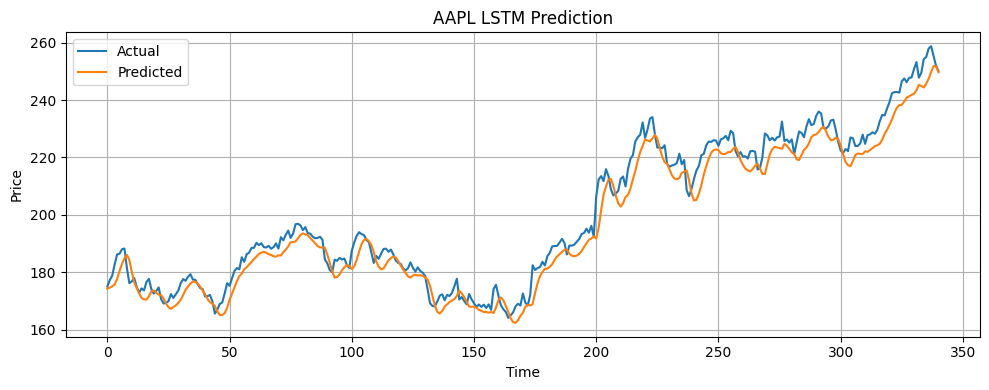


📊 Processing MSFT
Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0331
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.6100e-04
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.4172e-04
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.5891e-04
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.2367e-04
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.3932e-04
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.9098e-04
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.0779e-04
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.5030e-04
Epoch 10/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.1610e-04
Epoch 11/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.9332e-04
Epoch 12/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.8077e-04
Epoch 13/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.4930e-04
Epoch 14/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 3.2232e-04
Epoch 15/50


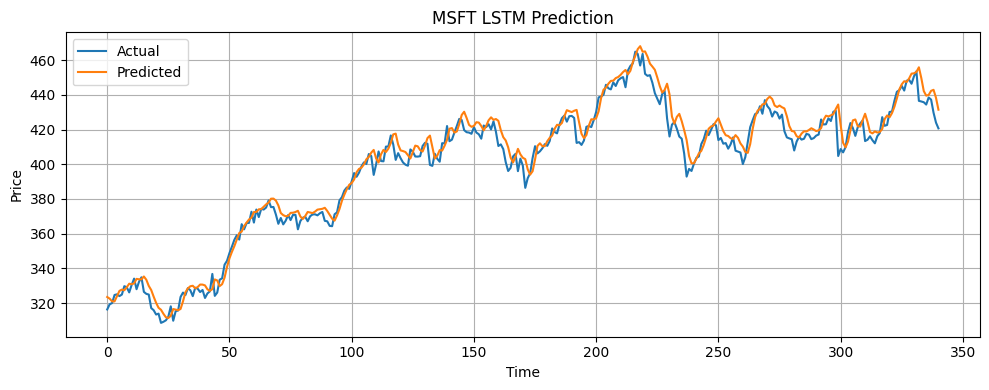


📊 Processing GOOGL
Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0389
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.5916e-04
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.4610e-04
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.7744e-04
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.4179e-04
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.1728e-04
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.8712e-04
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 4.9554e-04
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.7257e-04
Epoch 10/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.8429e-04
Epoch 11/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.8588e-04
Epoch 12/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.6956e-04
Epoch 13/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.8391e-04
Epoch 14/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.2712e-04
Epoch 15/

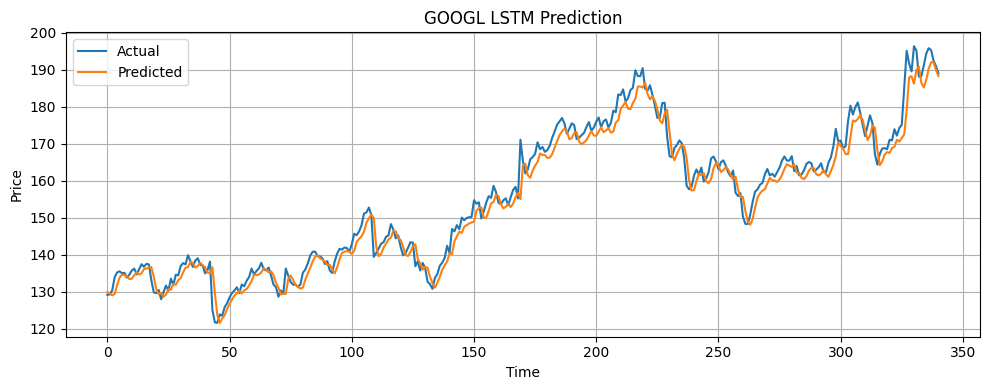


📊 Processing AMZN
Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0363
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0015
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0012
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0012
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0011
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0011
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0010
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.8848e-04
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9.3354e-04
Epoch 10/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9.8107e-04
Epoch 11/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.5621e-04
Epoch 12/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.2037e-04
Epoch 13/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.3567e-04
Epoch 14/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.7301e-04
Epoch 15/50
43/43 ━━━━━━━━━━━━━━━━

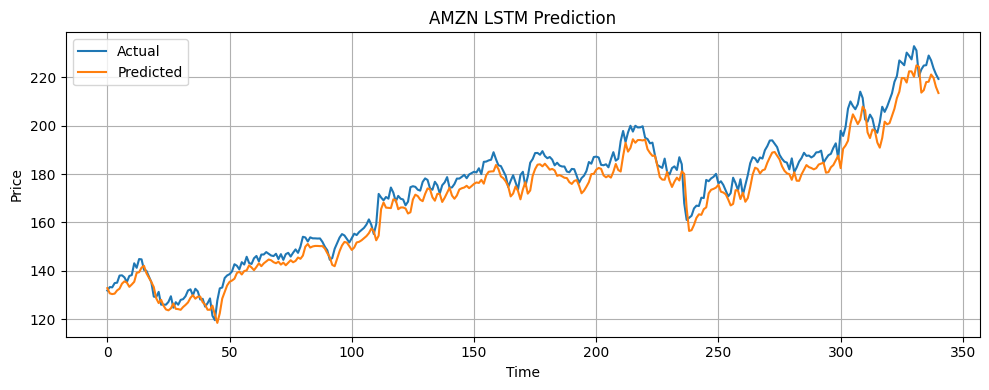


📊 Processing NVDA
Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0025
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.7676e-05
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.3850e-05
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.8287e-05
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.9509e-05
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.3643e-05
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.5778e-05
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.2578e-05
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.8740e-05
Epoch 10/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.6242e-05
Epoch 11/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.0081e-05
Epoch 12/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.9883e-05
Epoch 13/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.9380e-05
Epoch 14/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.7173e-05
Epoch 15/50
4

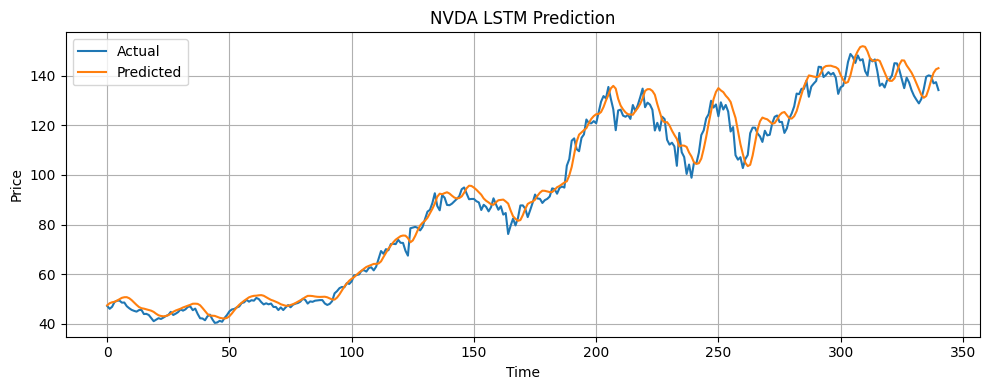


📊 Processing TSLA
Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0351
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0015
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0012
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0012
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 9.9888e-04
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.8512e-04
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.8662e-04
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.6748e-04
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.2598e-04
Epoch 10/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.3874e-04
Epoch 11/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.9526e-04
Epoch 12/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.4938e-04
Epoch 13/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.9438e-04
Epoch 14/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.8842e-04
Epoch 15/50
43/43 ━━━

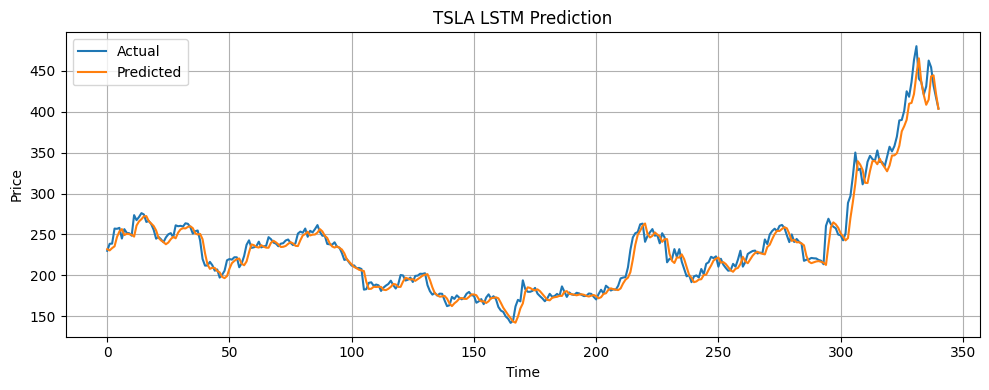


📊 Processing META
Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0202
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.0510e-04
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.5248e-04
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.4712e-04
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.4315e-04
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.4710e-04
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.5080e-04
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.2409e-04
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.9800e-04
Epoch 10/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.5767e-04
Epoch 11/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.6122e-04
Epoch 12/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.9550e-04
Epoch 13/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.6952e-04
Epoch 14/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.6423e-04
Epoch 15/50
4

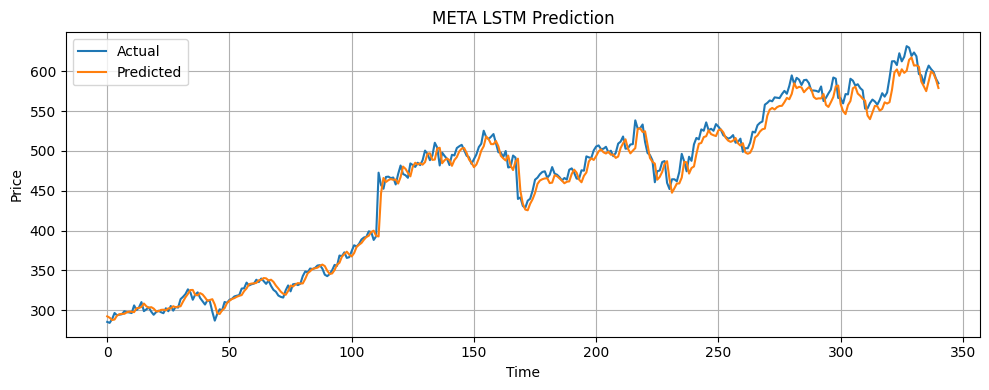


📊 Processing IBM
Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0093
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.3586e-04
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.0640e-04
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.4361e-04
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.0235e-04
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.9880e-04
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.3654e-04
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.3619e-04
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.4831e-04
Epoch 10/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.2088e-04
Epoch 11/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.8249e-04
Epoch 12/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.0974e-04
Epoch 13/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.9527e-04
Epoch 14/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.5531e-04
Epoch 15/50


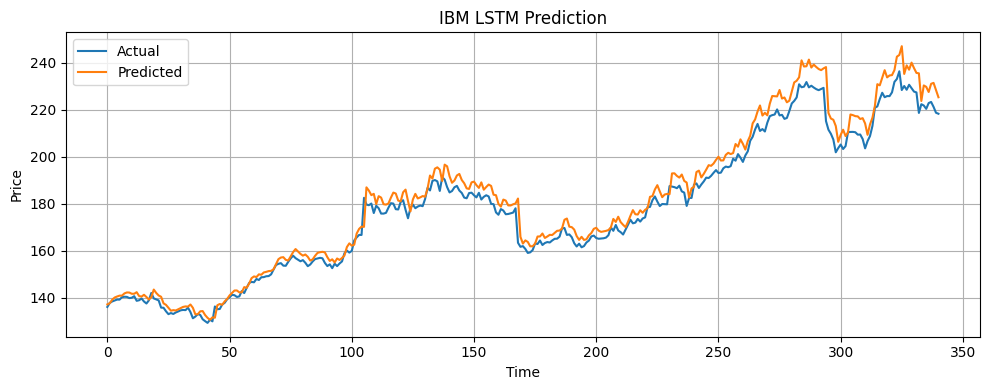


📊 Processing TSM
Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0170
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.6661e-04
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.5670e-04
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.2396e-04
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 4.0450e-04
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.2761e-04
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.5065e-04
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.5245e-04
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.2418e-04
Epoch 10/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.3629e-04
Epoch 11/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.7045e-04
Epoch 12/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.7831e-04
Epoch 13/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.5451e-04
Epoch 14/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.9241e-04
Epoch 15/5

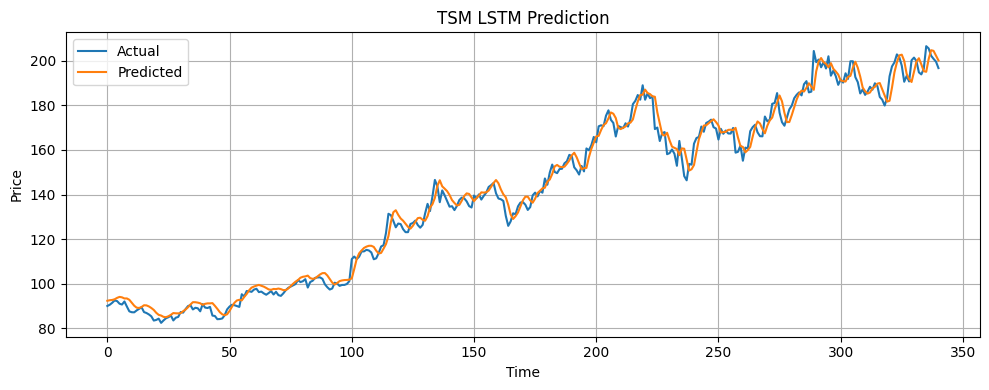


📊 Processing UNH
Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0467
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.8589e-04
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.6810e-04
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 7.0961e-04
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.9114e-04
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 7.5399e-04
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6.6221e-04
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.7360e-04
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.8524e-04
Epoch 10/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.2397e-04
Epoch 11/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.8553e-04
Epoch 12/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.9242e-04
Epoch 13/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.9467e-04
Epoch 14/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.9482e-04
Epoch 15/50
43

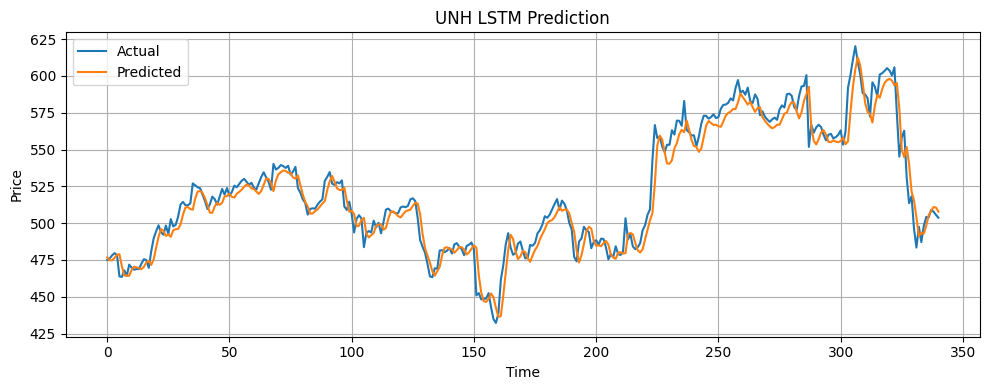


📊 Processing JNJ
Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1088
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0029
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0020
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0023
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0020
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0019
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0018
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0016
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0016
Epoch 10/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0017
Epoch 11/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0016
Epoch 12/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0013
Epoch 13/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0015
Epoch 14/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0015
Epoch 15/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.

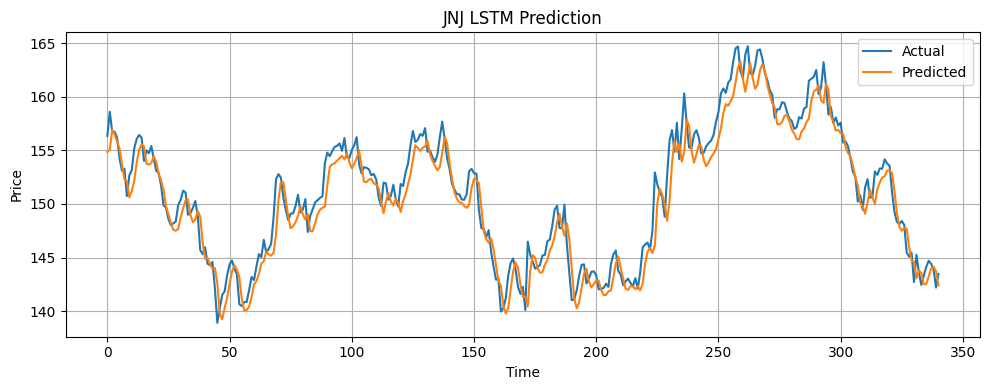


📊 Processing V
Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0586
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0014
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 8.5130e-04
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 8.6900e-04
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 8.4875e-04
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 7.8364e-04
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.2744e-04
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 7.8323e-04
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.1554e-04
Epoch 10/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.8332e-04
Epoch 11/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8.2879e-04
Epoch 12/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 7.1389e-04
Epoch 13/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 7.6565e-04
Epoch 14/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.9183e-04
Epoch 15/50
43/

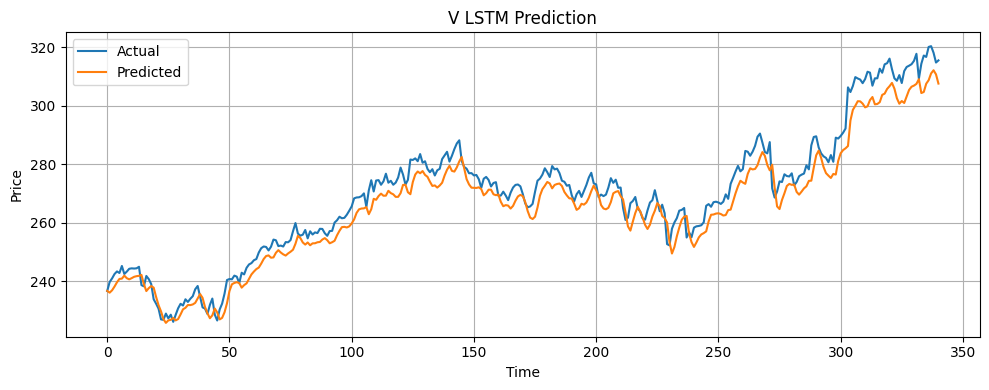


📊 Processing XOM
Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0366
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.4469e-04
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.7210e-04
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.6447e-04
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.5920e-04
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.2832e-04
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6.7326e-04
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.5641e-04
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6.2801e-04
Epoch 10/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6.6916e-04
Epoch 11/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.5574e-04
Epoch 12/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.0809e-04
Epoch 13/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.8323e-04
Epoch 14/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.5614e-04
Epoch 15/50
43

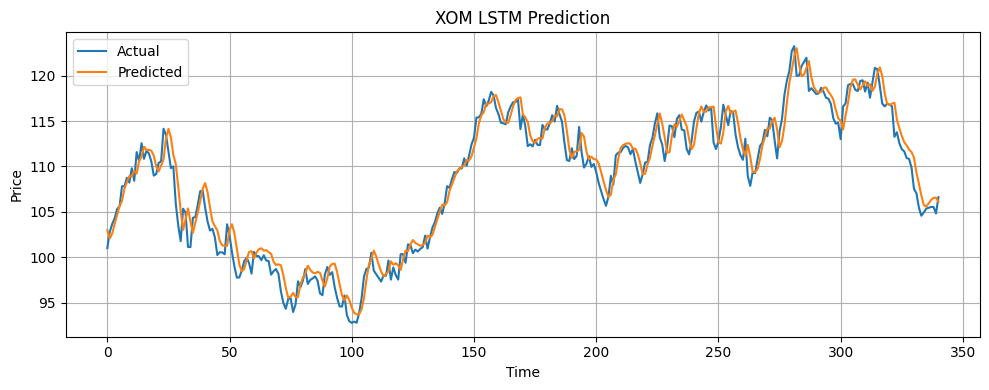


📊 Processing WMT
Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0124
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.6423e-04
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.9037e-04
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.9497e-04
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.5956e-04
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.5070e-04
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.7661e-04
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.3682e-04
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.8013e-04
Epoch 10/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.9737e-04
Epoch 11/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.9735e-04
Epoch 12/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.8602e-04
Epoch 13/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.9067e-04
Epoch 14/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.6469e-04
Epoch 15/5

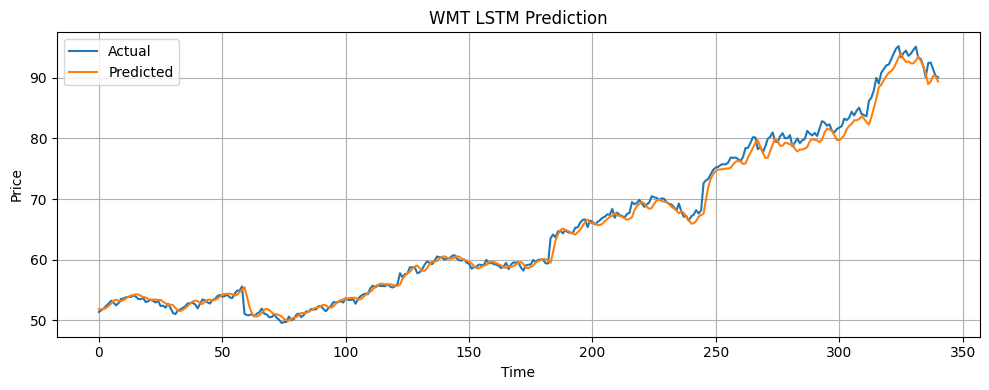


📊 Processing PG
Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0623
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0014
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 6.6802e-04
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 6.0004e-04
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 7.0296e-04
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 6.2616e-04
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.5352e-04
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.9845e-04
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.7989e-04
Epoch 10/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.8614e-04
Epoch 11/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.9824e-04
Epoch 12/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.1749e-04
Epoch 13/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.1355e-04
Epoch 14/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.6627e-04
Epoch 15/50
43

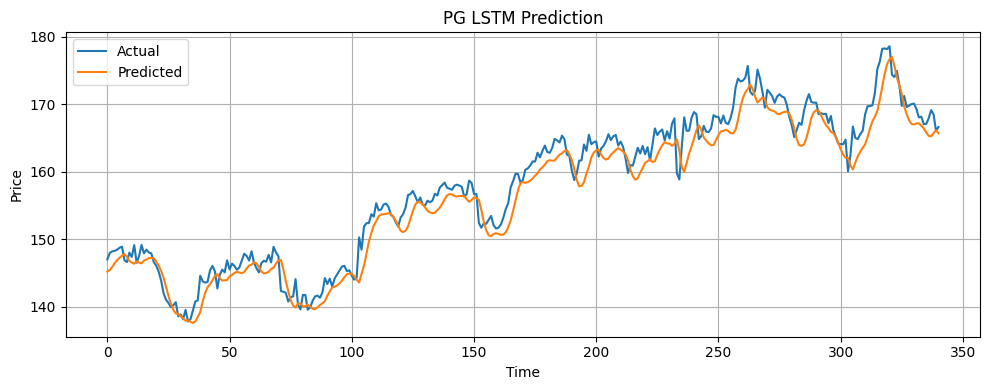

In [18]:
for symbol in symbols:
    try:
        print(f"\n📊 Processing {symbol}")
        df = pd.read_csv(f"{data_path}{symbol}_cleaned.csv", index_col='Date', parse_dates=True)
        df = df[['Close']].dropna()

        # Normalize
        scaler = MinMaxScaler()
        scaled_data = scaler.fit_transform(df)

        # Sequence creation
        def create_sequences(data, window=60):
            X, y = [], []
            for i in range(window, len(data)):
                X.append(data[i-window:i, 0])
                y.append(data[i, 0])
            return np.array(X), np.array(y)

        X, y = create_sequences(scaled_data)
        X = X.reshape((X.shape[0], X.shape[1], 1))

        # Train-test split
        split = int(len(X) * 0.8)
        X_train, X_test = X[:split], X[split:]
        y_train, y_test = y[:split], y[split:]

        # Model
        # LSTM Model
        model = Sequential([
            Input(shape=(X_train.shape[1], 1)),
            LSTM(64, return_sequences=True),
            LSTM(64),
            Dense(1)
        ])

        model.compile(optimizer='adam', loss='mean_squared_error')

        early_stop = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

        model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, callbacks=[early_stop])

        # Prediction
        y_pred = model.predict(X_test)
        y_pred_inv = scaler.inverse_transform(y_pred)
        y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

        # Accuracy (R² Score)
        r2 = r2_score(y_test_inv, y_pred_inv)
        print(f"📈 R² score for {symbol}: {r2:.4f}")

        # Save model if R² > 0.90
        if r2 > 0.90:
            model.save(f"/content/model/{symbol}_model.keras")
            print(f"✅ Model for {symbol} saved to models/{symbol}_model.keras")
        else:
            print(f"⚠️ Model for {symbol} NOT saved (R² below 0.90)")

        plt.figure(figsize=(10, 4))
        plt.plot(y_test_inv, label='Actual')
        plt.plot(y_pred_inv, label='Predicted')
        plt.title(f"{symbol} LSTM Prediction")
        plt.xlabel('Time')
        plt.ylabel('Price')
        plt.legend()
        plt.grid()
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"❌ Error for {symbol}: {e}")